<a href="https://colab.research.google.com/github/SuhelAnsari9272/Monte-Carlo-Simulation/blob/main/Monte_Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Monty hall problem simulation using Monte Carlo Method

import random

random.seed(1)  # getting same sample in each run
n = 100000  # Number of Trials in the Experiment
win_no_switch, win_switch = [0] * n , [0] * n

for i in range(n):
  doors = [1,2,3]  # 3 doors
  prize = random.choice(doors) #door which has the price
  chosen_door = random.choice(doors) #door which user selects
  #print("prize is in door ", prize)
  #print("User has chosen door ", chosen_door)

  #reveal that door which is not chosen by the user and which do not have the prize
  reveal = random.choice([door for door in doors if door != prize and door != chosen_door])
  #print("Host can reveal the doors ", reveal)
  win_no_switch[i]= chosen_door == prize  # tracking win if the door is not changed
  #print("Do he wins the game by not changing the door ", win_no_switch[i])

  doors.remove(reveal)
  doors.remove(chosen_door)
  chosen_door = doors[0]  # changed door after switching
  #print("User has chosen door after switching ", chosen_door)

  win_switch[i] = chosen_door == prize  # tracking win if the door is changed
  #print("Do he wins the game by changing the door ", win_switch[i])

# Monty Hall Problem Outputs
print(win_no_switch[:5])  # first few results for no switching
print(win_switch[:5])  # first few results of switching
print(sum(win_no_switch) / n)  # Prob of winning if you don't switch
print(sum(win_switch) / n)  # Prob of winning if you switch





[False, False, True, True, False]
[True, True, False, False, True]
0.3354
0.6646


Estimated Area of Shaded Region: 18.01373983612401


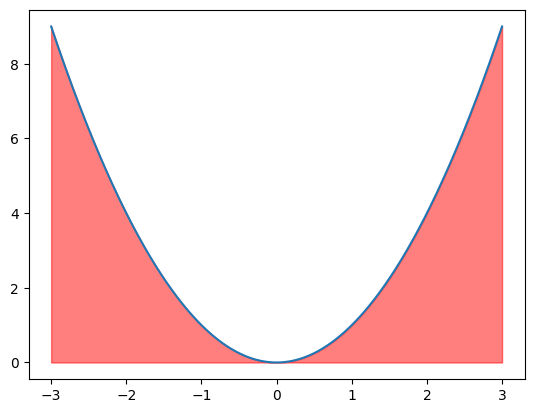

In [ ]:
#Sigle integral problem
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
  return x*x

#plot the function
x = np.linspace(-3,3,1000)
plt.plot(x,f(x))

# Shade the region under the curve
x_fill = np.linspace(-3,3,1000)
y_fill = f(x_fill)
plt.fill_between(x_fill, 0, y_fill, color = 'red', alpha = 0.5)


# Estimate the shaded region by Monte Carlo Simulation
# 2000 random samples are generated uniformly between (-3, 3)
query_points = np.random.uniform(-3, 3, 1000000)
area_shaded_region =  6 * np.mean(f(query_points))

print("Estimated Area of Shaded Region:", area_shaded_region)

# Show the plot
plt.show()


In [ ]:
#Solving double definite integral
import numpy as np
import plotly.graph_objects as go

# Define the function g(x, y) = x^2 + y^2
def g(x, y):
    return x**2 + y**2

# Generate 100 (x,y) values
x = y = np.linspace(-3, 3, 100)

# Create a grid of (x, y) values and evaluate g(x, y)
X, Y = np.meshgrid(x, y)
Z = g(X, Y)

# 3D Surface Plot
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
fig.show()

# Generate 1000 random samples for x and y uniformly between (-3, 3)
query_points_x = np.random.uniform(-3, 3, 1000)
query_points_y = np.random.uniform(-3, 3, 1000)

# Estimate the volume of the shaded region by Monte Carlo Simulation
volume_shaded_region = 36 * np.mean(g(query_points_x, query_points_y))

print("Estimated Volume of Shaded Region:", volume_shaded_region)


Estimated Volume of Shaded Region: 217.2624719286605


In [1]:
# Toy example
# A chips packet has exactly 1 toy with it
# There are 15 different toys with their probabilities assigned of occurrence in packet
# On average, how many packets of chips do you need to buy to collect all 15 different toys?
# selection with the probability
import numpy as np
import random
import string

random.seed(1)  # to get the same sample in every run
toys = list(string.ascii_uppercase[:15])
prob = [0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.02]

num_of_trials = 10000
list_np = []

for i in range(num_of_trials):
    collection_toys = []  # Collection of toys
    n = 0  # distinct number of toys

    while n != 15:
        packet = random.choices(toys, prob)[0]  # a packet is bought based on probabilities
        collection_toys.append(packet)
        n = len(set(collection_toys))

    num_packets = len(collection_toys)
    list_np.append(num_packets)

# Calculate the average number of trials needed
avg_num_packets = np.round(np.mean(list_np),0)
#print(collection_toys)
print("Average number of packets needed:", avg_num_packets)


Average number of packets needed: 117.0


In [ ]:
#Monte Carlo Simulation technique for the Tic Tac Toe
#The Players are selected random for starting game
import random

random.seed(1)
# def print_board(board):
#     for row in board:
#         print(" | ".join(row))
#         print("-" * 5)

def check_winner(board, player):
    for row in board:
        if row.count(player) == 3:
            return True

    for col in range(3):
        if [board[row][col] for row in range(3)].count(player) == 3:
            return True

    if board[0][0] == board[1][1] == board[2][2] == player:
        return True

    if board[0][2] == board[1][1] == board[2][0] == player:
        return True

    return False

def is_draw(board):
    return all(cell != " " for row in board for cell in row)

def random_move(board, player):
    empty_cells = [(i, j) for i in range(3) for j in range(3) if board[i][j] == " "]
    return random.choice(empty_cells)

def simulate_game():
    board = [[" " for _ in range(3)] for _ in range(3)]
    current_player = random.choice(["X","O"])

    while True:
        row, col = random_move(board, current_player)

        if board[row][col] == " ":
            board[row][col] = current_player
        else:
            continue

        if check_winner(board, current_player):
            return current_player

        if is_draw(board):
            return "Draw"

        current_player = "O" if current_player == "X" else "X"

def monte_carlo_simulation(num_simulations):
    wins_X = 0
    wins_O = 0
    draws = 0

    for _ in range(num_simulations):
        winner = simulate_game()
        if winner == "X":
            wins_X += 1
        elif winner == "O":
            wins_O += 1
        else:
            draws += 1

    probability_X = wins_X / num_simulations
    probability_O = wins_O / num_simulations
    probability_draw = draws / num_simulations

    return probability_X, probability_O, probability_draw

if __name__ == "__main__":
    num_simulations = 100000
    probability_X, probability_O, probability_draw = monte_carlo_simulation(num_simulations)

    print(f"Probability of Player X winning: {probability_X:.4f}")
    print(f"Probability of Player O winning: {probability_O:.4f}")
    print(f"Probability of Draw: {probability_draw:.4f}")
